In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from faker import Faker
import time
import datetime
import random
import math

In [2]:
df_prices = pd.read_csv('data/historical_stock_prices.csv')
df_prices['date'] = pd.to_datetime(df_prices['date'])
df_companies = pd.read_csv('data/historical_stocks.csv')
list_of_companies = df_companies['ticker']

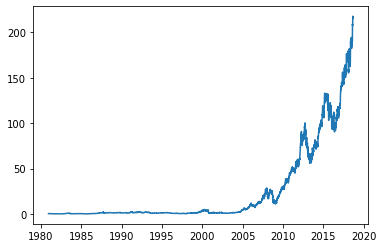

In [3]:
company_to_analyse = 'AAPL' # ticker
df_company = df_prices[df_prices['ticker'] == company_to_analyse]
plt.plot(df_company ['date'], df_company['close'])
# max_date = df_company['date'].max()
# min_date = df_company['date'].min()
# fake = Faker()
# investment_date = fake.date_between(start_date=min_date, end_date=max_date)

## Simulate Random Stock Market Investments

### Scenario 1:
- Investing from year X to year Y ('N' years) since a pre-defined 'Start_Investment_Year', 
- We invest a T amount of money in total, 
- either daily, monthly, or yearly
- the amounts of each investement are randomly distributed

In [4]:
# INPUTS
start_investment_year = 2012
end_investment_year = 2015
selling_day = '2018-02-02'
total_money_to_invest = 100000
investment_type = 'daily'

In [13]:
start_investment_date = datetime.datetime.strptime('01/01/'+str(start_investment_year), "%d/%m/%Y")
end_investment_date = datetime.datetime.strptime('31/12/'+str(end_investment_year), "%d/%m/%Y")

In [19]:
diff = (end_investment_date - start_investment_date).days


1460

In [18]:
diff.days

1460

In [46]:
def when_to_invest(start_investment_date, end_investment_date, investment_frecuency = 'daily', investment_type = 'random'):
    # 
    if investment_frecuency == 'monthly' and investment_type == 'random':
        pi = 1/12
    elif investment_frecuency == 'daily' and investment_type == 'random':
        pi = 1
    elif investment_frecuency == 'yearly' and investment_type == 'random':
        pi = 1/365
    else:
        print("Warning: only options for monthly, daily and yearly investments have been configured")
    # 
    if investment_type == 'random':
        number_of_individual_investments = math.ceil((end_investment_date - start_investment_date).days*pi)
        print(number_of_individual_investments)
        investment_dates_list = []
        fake = Faker()
        for i in range(number_of_individual_investments):
            investment_date_temp = fake.date_between(start_date=start_investment_date, end_date=end_investment_date)
            investment_dates_list.append(investment_date_temp)
        # 
        investment_dates_list

    return investment_dates_list

In [47]:
investment_frecuency = 'yearly'
investment_type = 'random'
investment_dates_list = when_to_invest(start_investment_date, end_investment_date, investment_frecuency, investment_type)

4


In [26]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

In [34]:
if investment_type == 'monthly':
    pi = 12
elif investment_type == 'daily':
    pi = 365
elif investment_type == 'yearly':
    pi = 1
else:
    print("Warning: only options for monthly, daily and yearly investments have been configured")

number_of_individual_investments = (end_investment_year - start_investment_year)*pi
print(number_of_individual_investments)

1095


How much will the monkey invest each time?

In [35]:
investment_quantities_list = np.random.dirichlet(np.ones(number_of_individual_investments))*total_money_to_invest
# 
investment_quantities_list

array([ 18.63478579,  19.97422511,  23.79699664, ..., 149.26198615,
        25.08613347, 177.25772273])

When is the monkey going to invest this money?

In [ ]:
investment_dates_list = []
fake = Faker()
for i in range(number_of_individual_investments):
    investment_date_temp = fake.date_between(start_date=start_investment_date, end_date=end_investment_date)
    investment_dates_list.append(investment_date_temp)
# 
investment_dates_list

[datetime.date(2014, 7, 29),
 datetime.date(2015, 6, 24),
 datetime.date(2013, 9, 12),
 datetime.date(2014, 4, 27),
 datetime.date(2012, 10, 26),
 datetime.date(2013, 4, 7),
 datetime.date(2013, 7, 8),
 datetime.date(2014, 1, 1),
 datetime.date(2012, 4, 22),
 datetime.date(2013, 10, 22),
 datetime.date(2015, 12, 12),
 datetime.date(2015, 6, 30),
 datetime.date(2012, 6, 21),
 datetime.date(2014, 4, 21),
 datetime.date(2012, 4, 25),
 datetime.date(2013, 8, 2),
 datetime.date(2013, 2, 24),
 datetime.date(2015, 1, 10),
 datetime.date(2013, 12, 20),
 datetime.date(2014, 9, 23),
 datetime.date(2015, 8, 15),
 datetime.date(2012, 10, 13),
 datetime.date(2015, 11, 5),
 datetime.date(2013, 12, 4),
 datetime.date(2014, 6, 25),
 datetime.date(2015, 7, 7),
 datetime.date(2012, 7, 24),
 datetime.date(2013, 4, 23),
 datetime.date(2015, 10, 11),
 datetime.date(2013, 6, 19),
 datetime.date(2014, 11, 15),
 datetime.date(2015, 7, 13),
 datetime.date(2014, 8, 7),
 datetime.date(2013, 11, 18),
 datetime.da

Which stocks is the monkey going to pick up?

Let's begin with removing stocks that didn't exists at the starting date or that were discontinued before the ending date

In [ ]:
df_prices_temp = df_prices[(df_prices['date']>=start_investment_date) & (df_prices['date']<=end_investment_date)]

Some dates may not be avaible for trading - as holidays and weekends.
Pending on sorting this out.

In [ ]:
number_of_business_days_period = np.busday_count(start_investment_date.date(),end_investment_date.date())
print(number_of_business_days_period)
number_of_data_points = df_prices_temp['ticker'].value_counts().max()
print(number_of_data_points)

1043
1006


Difference above it is probably attributed to holidays where Nasdaq closes: nine US stock market holidays - 5*9=36 days.

In [ ]:
list_of_companies = df_prices_temp['ticker'].unique().tolist()

In [ ]:
investment_companies_list = []
for i in range(number_of_individual_investments):
    company = random.choice(list_of_companies)
    investment_companies_list.append(company)
investment_companies_list

['FCT',
 'TWTR',
 'DPS',
 'LDP',
 'BLPH',
 'WSC',
 'RWT',
 'IRT',
 'ALLE',
 'ABG',
 'PACB',
 'WPX',
 'TSE',
 'VEON',
 'SKT',
 'RVLT',
 'WTFC',
 'VTHR',
 'UFS',
 'GGT',
 'VCV',
 'FFC',
 'MYOS',
 'MUE',
 'UNAM',
 'UN',
 'MYND',
 'ZBRA',
 'IUSB',
 'PBBI',
 'FDC',
 'QSII',
 'MOXC',
 'TCCA',
 'WPXP',
 'TSU',
 'TRMB',
 'GILT',
 'JCOM',
 'RCON',
 'ASET',
 'LPTH',
 'HCI',
 'CVBF',
 'UCFC',
 'BDJ',
 'CHGG',
 'PCMI',
 'KIM',
 'GWRE',
 'DVD',
 'IUSB',
 'DSGX',
 'TANNL',
 'PSB',
 'STRM',
 'INSY',
 'BTI',
 'HUBB',
 'ESRT',
 'SBCF',
 'GIB',
 'JFR',
 'MTH',
 'NMZ',
 'KORS',
 'VMBS',
 'RHT',
 'ARR',
 'MDCA',
 'NAO',
 'EDUC',
 'MTDR',
 'BHR',
 'IP',
 'ISD',
 'TNAV',
 'NVS',
 'TCBK',
 'MEI',
 'ECHO',
 'ADX',
 'FFA',
 'USEG',
 'VLO',
 'TCRZ',
 'GOOG',
 'BLW',
 'PEO',
 'POWL',
 'PYDS',
 'CMPR',
 'HURN',
 'TPRE',
 'SUM',
 'MDGS',
 'CCRN',
 'BRFS',
 'RVLT',
 'FKO',
 'BFAM',
 'ETM',
 'PSL',
 'GWB',
 'CGO',
 'SHV',
 'CSCO',
 'VUZI',
 'PCTY',
 'ATEC',
 'RJF',
 'VEON',
 'INDB',
 'SCD',
 'FOR',
 'BLIN',
 'TRN',


Create summary of the investment stragedy in a dataframe

In [ ]:
df_investment_stragedy = pd.DataFrame(list(zip(investment_companies_list, investment_dates_list, investment_quantities_list)),
               columns =['Company', 'Investment_Date', 'Investment_Value'])

In [ ]:
df_investment_stragedy = df_investment_stragedy.sort_values(by='Investment_Date')
df_investment_stragedy.reset_index(inplace=True, drop=True) 
df_investment_stragedy['Investment_Date'] = pd.to_datetime(df_investment_stragedy['Investment_Date'])
df_investment_stragedy

,Company,Investment_Date,Investment_Value
0,STBA,2012-01-02,158.230118
1,HFWA,2012-01-02,137.074319
2,WIA,2012-01-02,119.404855
3,HUBB,2012-01-02,12.828969
4,FLS,2012-01-05,67.643386
...,...,...,...
1090,FMB,2015-12-25,75.291245
1091,KORS,2015-12-28,304.622928
1092,VUZI,2015-12-28,52.366203
1093,MCI,2015-12-30,224.592266


In [ ]:
for i in range(len(df_investment_stragedy)):
    print(i)
    df_temp = df_investment_stragedy.iloc[i]
    # 
    try:
        value_at_purchase_date = df_prices[(df_prices['ticker'] == df_temp['Company']) &
                                        (df_prices['date'] == df_temp['Investment_Date'])]
        value_at_selling_date = df_prices[(df_prices['ticker'] == df_temp['Company']) &
                                        (df_prices['date'] == selling_day)]
        # 
        number_of_stocks = df_temp['Investment_Value']/value_at_purchase_date['open'].iloc[0]
        # 
        stock_buying_value = value_at_purchase_date['open'].iloc[0]
        stock_selling_value = value_at_selling_date['close'].iloc[0]
        percentage_change = (stock_selling_value - stock_buying_value)/stock_buying_value
        # 
        selling_value = number_of_stocks*stock_selling_value
        profit = selling_value - df_temp['Investment_Value']
        # 
        df_investment_stragedy.at[i,'selling_value'] = selling_value
        df_investment_stragedy.at[i,'number_of_stocks'] = number_of_stocks
        df_investment_stragedy.at[i,'stock_buying_value'] = stock_buying_value
        df_investment_stragedy.at[i,'stock_selling_value'] = stock_selling_value
        df_investment_stragedy.at[i,'percentage_change'] = percentage_change
        df_investment_stragedy.at[i,'net_profit'] = profit
    except Exception as e: 
        print(e)
        print('Some error occurred, needs to investigated')


0
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
1
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
2
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
3
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
4
5
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
6
7
8
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
9
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
10
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
11
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
12
13
14
15
16
17
18
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
19
single positional indexer is out-of-bounds
Some error occurred, needs to investigated
20
s

In [ ]:
df_investment_stragedy

,Company,Investment_Date,Investment_Value,selling_value,number_of_stocks,stock_buying_value,stock_selling_value,percentage_change,net_profit
0,STBA,2012-01-02,158.230118,NaN,NaN,NaN,NaN,NaN,NaN
1,HFWA,2012-01-02,137.074319,NaN,NaN,NaN,NaN,NaN,NaN
2,WIA,2012-01-02,119.404855,NaN,NaN,NaN,NaN,NaN,NaN
3,HUBB,2012-01-02,12.828969,NaN,NaN,NaN,NaN,NaN,NaN
4,FLS,2012-01-05,67.643386,87.412744,1.961246,34.490002,44.570000,0.292259,19.769358
...,...,...,...,...,...,...,...,...,...
1090,FMB,2015-12-25,75.291245,NaN,NaN,NaN,NaN,NaN,NaN
1091,KORS,2015-12-28,304.622928,489.240595,7.495643,40.639999,65.269997,0.606053,184.617667
1092,VUZI,2015-12-28,52.366203,67.763306,8.019326,6.530000,8.450000,0.294027,15.397103
1093,MCI,2015-12-30,224.592266,194.077708,12.929894,17.370001,15.010000,-0.135866,-30.514557


In [ ]:
df_investment_stragedy.to_csv('invesment_stragedy.csv')

In [ ]:
df_investment_stragedy['net_profit'].sum()

30694.992341060944

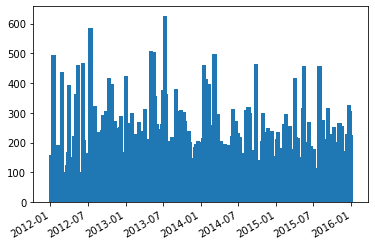

In [ ]:
fig, ax = plt.subplots()
ax.bar(df_investment_stragedy['Investment_Date'],df_investment_stragedy['Investment_Value'],width=20)
# ax.set_xticklabels(df_investment_stragedy['Company'])
fig.autofmt_xdate()

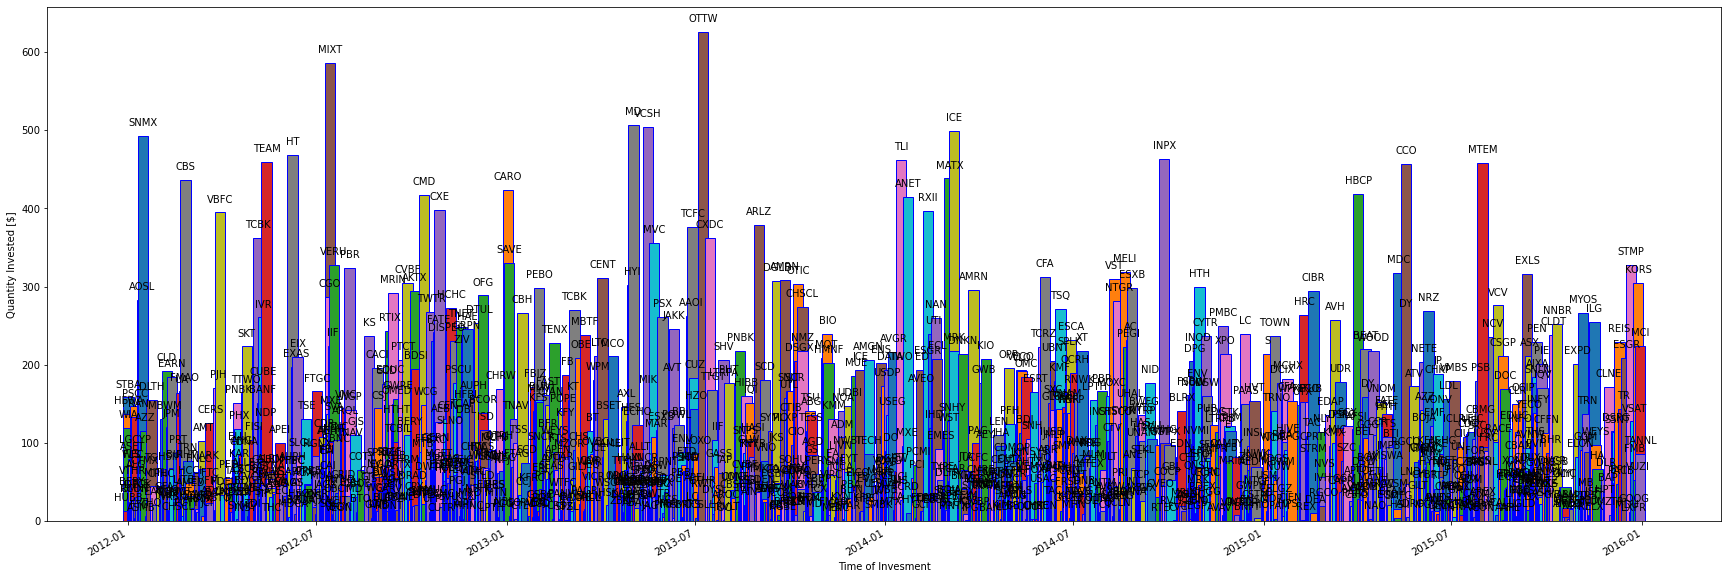

In [ ]:
fig, ax = plt.subplots()
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df_investment_stragedy)) % cmap.N)
hbars = ax.bar(df_investment_stragedy['Investment_Date'],df_investment_stragedy['Investment_Value'],width=10, edgecolor='blue', color =  colors)
fig.autofmt_xdate()
ax.bar_label(hbars, labels=df_investment_stragedy['Company'], padding=8, color='k', fontsize=10)
ax.set_xlabel('Time of Invesment')
ax.set_ylabel('Quantity Invested [$]')
fig.set_size_inches(30, 10.5)
fig.savefig('invesment_stragedy.jpg', dpi=300)

In [ ]:
percentage_change = df_investment_stragedy['percentage_change']
percentage_change = percentage_change.dropna()
percentage_change

4       0.292259
6       1.172491
7       1.221567
12      2.981799
13     -0.697279
          ...   
1088    0.483423
1091    0.606053
1092    0.294027
1093   -0.135866
1094   -0.004765
Name: percentage_change, Length: 621, dtype: float64

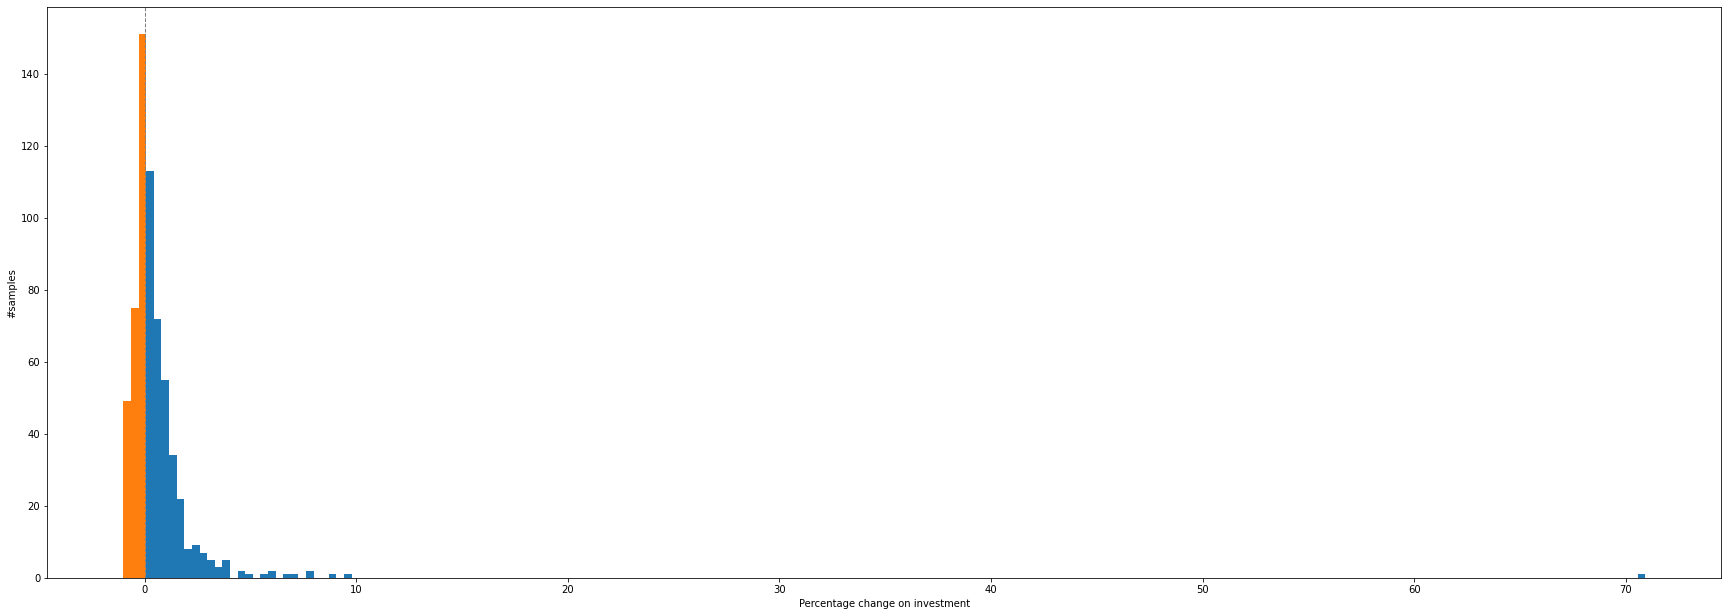

In [ ]:
fig, ax = plt.subplots()
_, _, bars  = plt.hist(percentage_change, bins = 200, color="C1")
for bar in bars:
    if bar.get_x() > 0:
        bar.set_facecolor("C0")
plt.axvline(x=0, linestyle='--',linewidth=1, color='grey')
plt.xlabel("Percentage change on investment")
plt.ylabel("#samples")
fig.set_size_inches(30, 10.5)
fig.savefig('distribution_of_returns.jpg', dpi=300)
